<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Mixture_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dexpy

  Preparing metadata (setup.py) ... done
  Created wheel for dexpy: filename=dexpy-0.12-py3-none-any.whl size=30216 sha256=cdae74c8c595267fb44d44701405263d471aacbea4dacf4d89c850177d12add6
  Stored in directory: /root/.cache/pip/wheels/9a/17/c2/ea9c81907465bdbedefb72e7206a6f013d15caa3cd39900d37
Successfully built dexpy


# Mixture Designs: Elongationo of Yarn
This example has to do with the elongation of yarn based on its component fabrics. There are three components in this mixture and each component is a synthetic material. The mixture design was one that we had looked at previously. It is a simple lattice design of degree 2. This means that it has mixtures of 0, 1/2, 100%. The components of this design are made up of these three possibilities.

adapted from https://online.stat.psu.edu/stat503/lesson/11/11.3/11.3.3

In [2]:
import pandas as pd
data=pd.read_csv('mixture_data.csv', sep=';')
data

,A,B,C,Y
0,1.0,0.0,0.0,11.0
1,0.5,0.5,0.0,15.0
2,0.5,0.0,0.5,17.7
3,0.0,1.0,0.0,8.8
4,0.0,0.5,0.5,10.0
5,0.0,0.0,1.0,16.8
6,1.0,0.0,0.0,12.4
7,0.5,0.5,0.0,14.8
8,0.5,0.0,0.5,16.4
9,0.0,1.0,0.0,10.0


the first 6 runs show you the pure components, and in addition, you have the 5 mixed components. All of this was replicated 3 times so that we have 15 runs. There were three that had missing data.

You can also specify in more detail which type of points that you want to include in the mixture design using the dialog boxes in Minitab if your experiment requires this.

Mixture designs with K=3 can be visualized using ternary diagrams.

In [3]:
import plotly.express as px
fig = px.scatter_ternary(data, a="A", b="B", c="C")

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()



Let us fit a quadratic model (linear + interaction terms). Remember we only have 6 points in this design, the vertex, the half-lengths, so we are fitting a response surface to these 6 points.



In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dat=data.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

mod = smf.ols(formula='Y ~ A + B + C + A:B + A:C + B:C -1', data=dat)

res = mod.fit()
res.summary()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     35.20
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.20e-05
Time:                        09:20:03   Log-Likelihood:                -15.081
No. Observations:                  15   AIC:                             42.16
Df Residuals:                       9   BIC:                             46.41
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             11.7000      0.604     19.381      0.000      10.334      13.066
B              9.4000      0.604     15.571      0.000       8.034      10.766
C             16.4000      0.604     27.166      0.000      15.034      17.766
A:B           19.0000      2.608      7.285      0.000      13.100      24.900
A:C           11.4000      2.608      4.371      0.002       5.500      17.300
B:C           -9.6000      2.608     -3.681      0.005     -15.500      -3.700
==============================================================================
Omnibus:                        3.100   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.635
Skew:                           0.526   Prob(JB):                        0.441
Kurtosis:                       1.770   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we get 2 df linear, 3 df quaratic, these are the five regression parameters. If you look at the individual coefficients, six of them because they are is no intercept, three linear and three cross-product terms... The 9 df for error are from the triple replicates and the double replicates. This is pure error and there is no additional df for lack of fit in this full model.

In [14]:
table = sm.stats.anova_lm(res, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,1468.825714,1468.825714,2015.157230,6.754033e-12
B,1.0,531.676104,531.676104,729.433679,6.333531e-10
C,1.0,807.101273,807.101273,1107.303575,9.846634e-11
A:B,1.0,40.455786,40.455786,55.503365,3.891910e-05
A:C,1.0,20.336837,20.336837,27.901149,5.056584e-04
B:C,1.0,9.874286,9.874286,13.547038,5.070512e-03
Residual,9.0,6.560000,0.728889,NaN,NaN


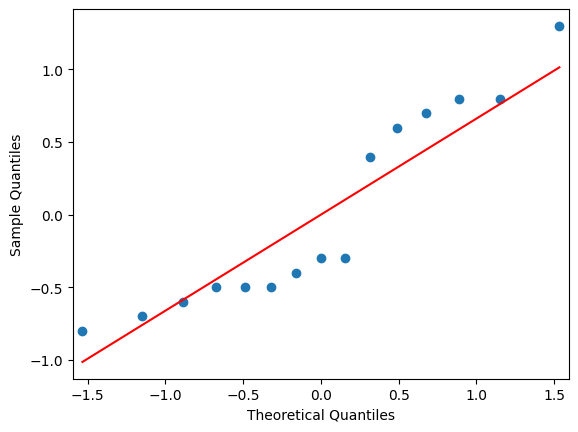

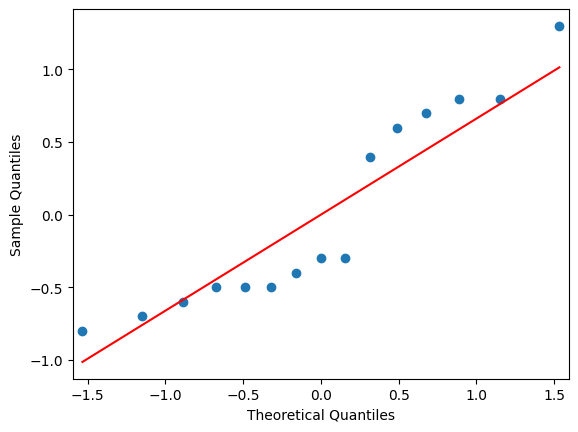

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = res.resid
sm.qqplot(residuals, line="s")




Let's Look at the results.
If we look at the coutour service plot we get

In [21]:
import plotly.figure_factory as ff
import numpy as np


fig = ff.create_ternary_contour(np.array([dat['A'], dat['B'], dat['C']]), dat['Y'],
                                pole_labels=['A', 'B', 'C'],
                                interp_mode='cartesian')
fig.show()